# Mall Customer Segmentation Data
This project performs customer segmentation using the K-Means clustering algorithm. It applies unsupervised learning to categorize customers based on their annual income and spending score.

Dataset: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

## Step 1: Importing Libraries
- `numpy`: For numerical operations.
- `pandas`: For handling datasets.
- `seaborn`: For visualization.
- `matplotlib.pyplot`: For plotting graphs.
- `KMeans`: For applying the K-Means clustering algorithm.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Step 2: Loading the Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Step 3: Extracting the Features for Clustering
- We are selecting the **Annual Income** and **Spending Score** columns to cluster the customers based on these two features.

In [4]:
X = df.iloc[:, [3, 4]].values

In [5]:
X[0:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

## Step 4: Finding the Optimal Number of Clusters (Elbow Method)
- We loop from **1 to 10 clusters** to find the "Elbow Point."

In [6]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

## Step 5: Plotting the Elbow Graph

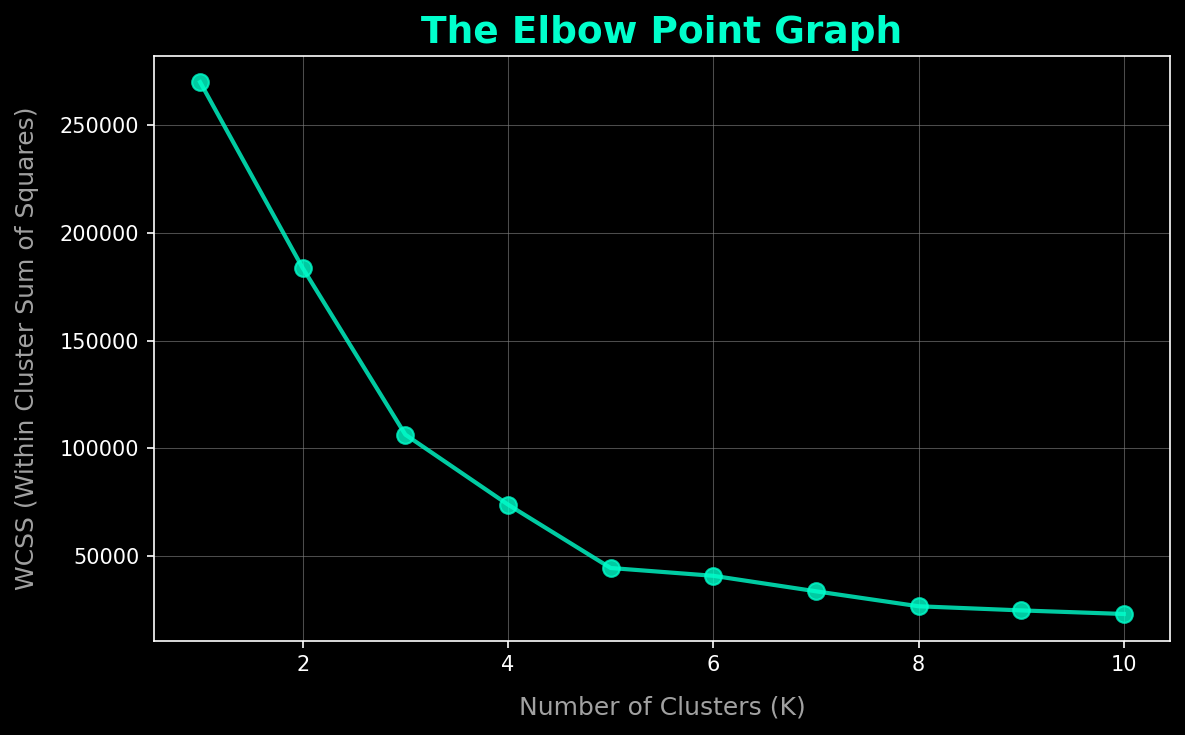

In [7]:
plt.style.use("dark_background")
plt.figure(figsize=(8, 5), dpi=150)

plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='#00FFCC', markersize=8, linewidth=2, alpha=0.8)

plt.title("The Elbow Point Graph", fontsize=18, color="#00FFCC", weight="bold")
plt.xlabel("Number of Clusters (K)", fontsize=12, color="#A1A1A1", labelpad=10)
plt.ylabel("WCSS (Within Cluster Sum of Squares)", fontsize=12, color="#A1A1A1", labelpad=10)

plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()

## Step 6: Training the K-Means Model with the Optimal Number of Clusters (K = 5)
- We use **K = 5**, which is the optimal number of clusters from the Elbow Method.
- `clusters` contains the cluster labels for each data point.

In [8]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
clusters = kmeans.fit_predict(X)

## Step 7: Visualizing the Clusters

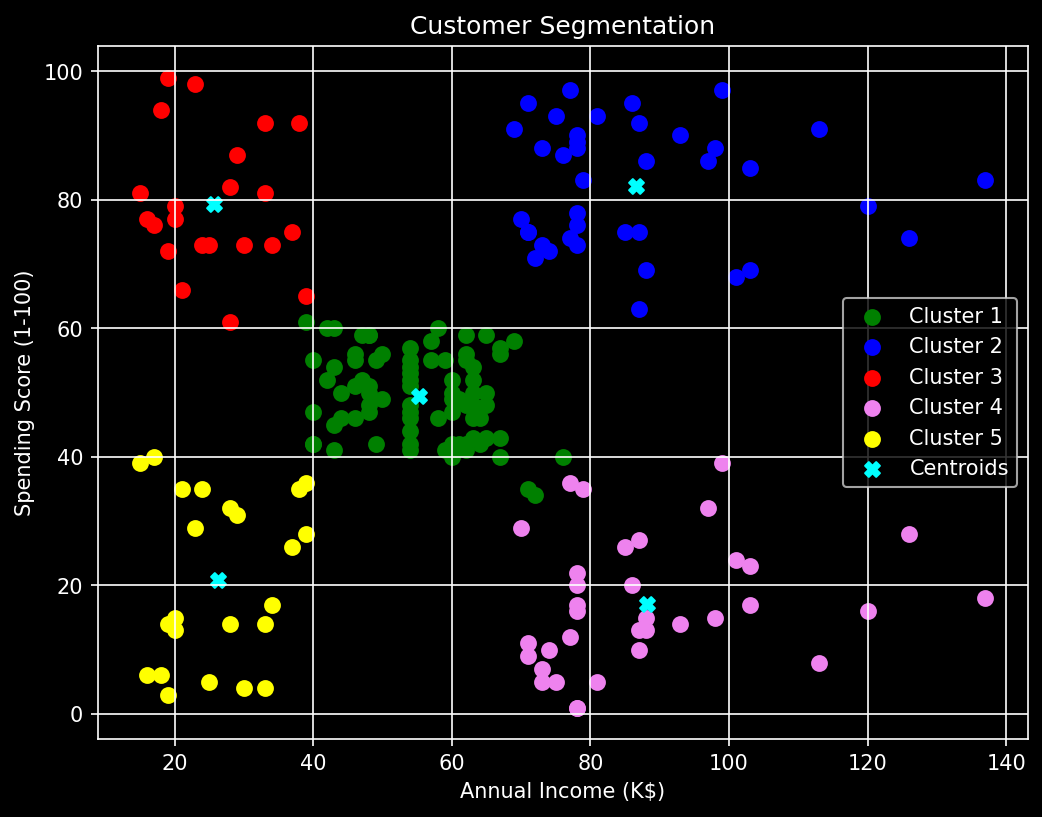

In [9]:
plt.figure(figsize=(8, 6), dpi=150)
colors = ["green", "blue", "red", "violet", "yellow"]
labels = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"]

for i in range(0,5):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], s=50, color=colors[i], label=labels[i])

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c="cyan", marker="X", label="Centroids")
    
plt.title("Customer Segmentation")
plt.xlabel("Annual Income (K$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)